In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1,1))
y = np.array([5, 20, 14, 32, 22, 30])

In [16]:
model = LinearRegression().fit(x,y)

In [17]:
r_sq = model.score(x,y)
print('Model Score (coeddicient of determinatoin) : ' + str(r_sq))
print('Intercept : ', model.intercept_)
print('Slope : ', model.coef_)


Model Score (coeddicient of determinatoin) : 0.6249401829697395
Intercept :  7.728571428571428
Slope :  [0.42571429]


In [18]:
y_pred = model.predict(x)
print('predicted respone : ',y_pred,sep='\n')

predicted respone : 
[ 9.85714286 14.11428571 18.37142857 22.62857143 26.88571429 31.14285714]


In [19]:
y_pred = model.intercept_ + model.coef_*x
print('predicted respone : ',y_pred,sep='\n')

predicted respone : 
[[ 9.85714286]
 [14.11428571]
 [18.37142857]
 [22.62857143]
 [26.88571429]
 [31.14285714]]


In [20]:
#predict
x_new = np.arange(5,60,3).reshape((-1,1))
y_new = model.predict(x_new)
print(y_new)

[ 9.85714286 11.13428571 12.41142857 13.68857143 14.96571429 16.24285714
 17.52       18.79714286 20.07428571 21.35142857 22.62857143 23.90571429
 25.18285714 26.46       27.73714286 29.01428571 30.29142857 31.56857143
 32.84571429]


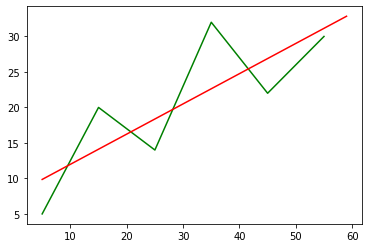

<Figure size 432x288 with 0 Axes>

In [23]:
plt.plot(x, y , 'g')
plt.plot(x_new, y_new, 'r')
plt.show()
plt.clf()

Multiple Regression

In [170]:
a = [[0,1],[5,1],[15,2],[25,5],[35,11],[45,15],[55,34],[60,35]]
b = np.array([4,5,20,14,32,22,38,43])
a = np.array(a)

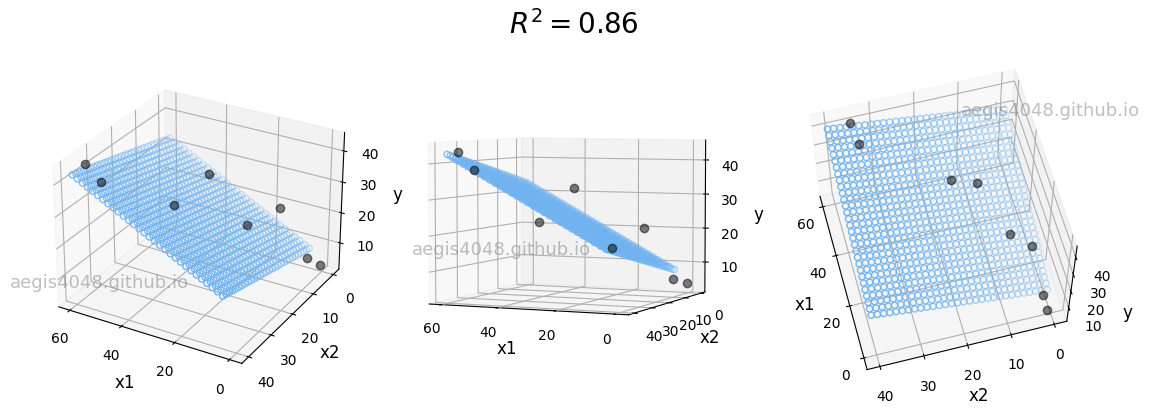

In [176]:
x = a[:, 0]
y = a[:, 1]
z = b

x_pred = np.linspace(5, 60, 30)   # range of porosity values
y_pred = np.linspace(0, 40, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = LinearRegression()
model = ols.fit(a, b)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(a, b)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('x1', fontsize=12)
    ax.set_ylabel('x2', fontsize=12)
    ax.set_zlabel('y', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

In [177]:

print('Model Score (coeddicient of determinatoin) : ', r2)
print('Intercept : ', model.intercept_)
print('Slope : ', model.coef_)

Model Score (coeddicient of determinatoin) :  0.8615939258756776
Intercept :  5.52257927519819
Slope :  [0.44706965 0.25502548]


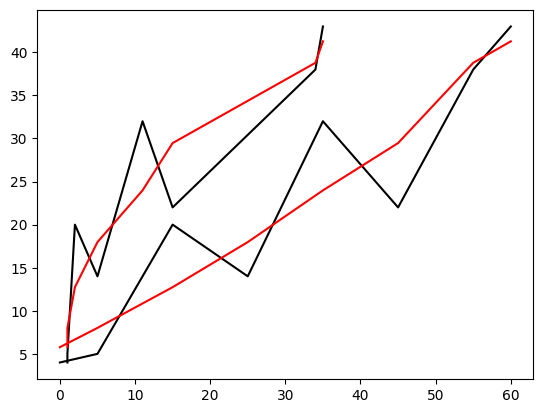

In [178]:
plt.plot(a , b ,'black', label = 'actual')
plt.plot(a_new , b_new ,'r', label = 'predicted')